#Training for Housing Price Dataset


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [17]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [18]:
# Feature scaling using StandardScaler
scaler = StandardScaler()

# Convert tensors to numpy for scaling
X_train_np = X_train.numpy()
X_test_np = X_test.numpy()

X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Convert scaled data back to tensors
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)

train_dataset = TensorDataset(X_train_scaled, y_train)
test_dataset = TensorDataset(X_test_scaled, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [19]:
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.hidden1 = nn.Linear(8, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

model = MLPModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {epoch_train_loss:.4f}")

Epoch 1/100, Training Loss: 0.9995
Epoch 2/100, Training Loss: 0.4340
Epoch 3/100, Training Loss: 0.3888
Epoch 4/100, Training Loss: 0.4035
Epoch 5/100, Training Loss: 0.3622
Epoch 6/100, Training Loss: 0.3492
Epoch 7/100, Training Loss: 0.3479
Epoch 8/100, Training Loss: 0.3289
Epoch 9/100, Training Loss: 0.3204
Epoch 10/100, Training Loss: 0.3286
Epoch 11/100, Training Loss: 0.3153
Epoch 12/100, Training Loss: 0.3167
Epoch 13/100, Training Loss: 0.3090
Epoch 14/100, Training Loss: 0.3150
Epoch 15/100, Training Loss: 0.3053
Epoch 16/100, Training Loss: 0.3003
Epoch 17/100, Training Loss: 0.3182
Epoch 18/100, Training Loss: 0.2951
Epoch 19/100, Training Loss: 0.2920
Epoch 20/100, Training Loss: 0.2893
Epoch 21/100, Training Loss: 0.2927
Epoch 22/100, Training Loss: 0.2900
Epoch 23/100, Training Loss: 0.2843
Epoch 24/100, Training Loss: 0.2831
Epoch 25/100, Training Loss: 0.2833
Epoch 26/100, Training Loss: 0.2856
Epoch 27/100, Training Loss: 0.2786
Epoch 28/100, Training Loss: 0.2837
E

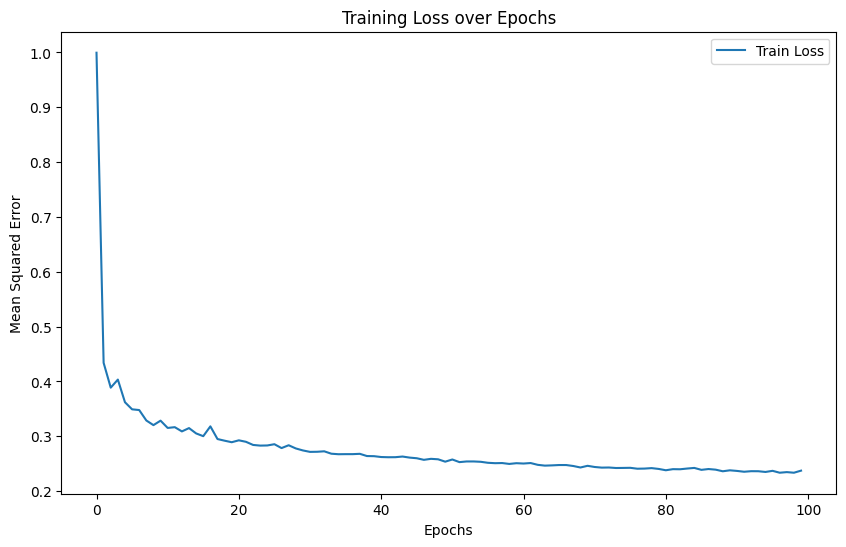

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

model.eval()
test_running_loss = 0.0
y_pred_list = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_running_loss += loss.item() * inputs.size(0)
        y_pred_list.append(outputs.numpy())

Test MSE: 0.2645
Test R^2 Score: 0.7982


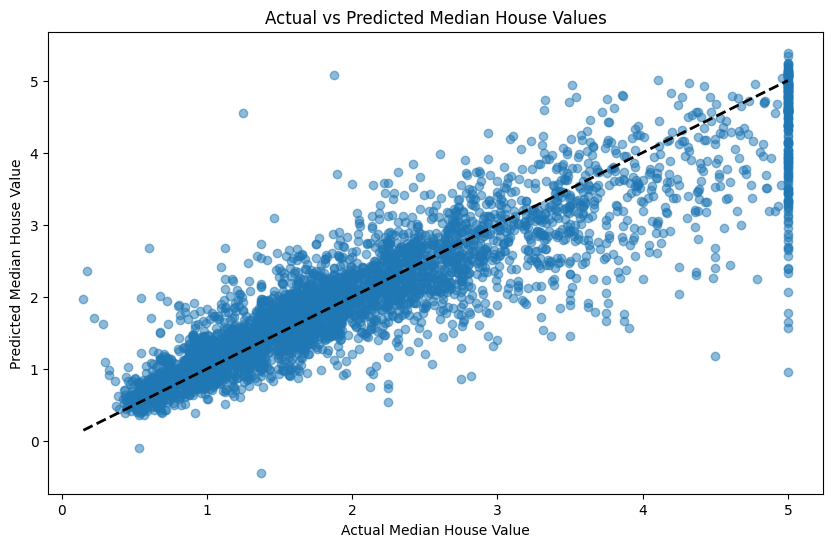

In [22]:
# Calculate average test loss
test_loss = test_running_loss / len(test_loader.dataset)
print(f'Test MSE: {test_loss:.4f}')

# Concatenate all predictions
y_pred = np.vstack(y_pred_list)
y_test_np = y_test.numpy()

r2 = r2_score(y_test_np, y_pred)
print(f'Test R^2 Score: {r2:.4f}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'k--', lw=2)
plt.show()
